<a href="https://colab.research.google.com/github/Raptor-sj22/ML-Training/blob/main/Logistic%20Regression/Logistic_regression_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Summary

This code performs **logistic regression preparation and exploratory analysis** on the **Wine Quality dataset** from Kaggle. It downloads the dataset, removes missing values, shuffles the data with a fixed random seed, and creates a **new boolean feature** for wine color (red = 1, white = 0). Wine quality is reclassified into three categories: **Poor**, **Good**, and **Excellent**, and encoded numerically using `LabelEncoder`.

The dataset is analyzed through:
- **Mutual Information** computation to identify feature relevance for classification,
- **Statistical summaries** and **data inspection**,
- **Correlation matrix visualization** using `Plotly`,
- **Pairwise feature plotting** using `Seaborn` colored by quality classes.

Due to the fact that the data samples are too intertwined and messy, a **polynomial logistic regression** was found **not suitable**, and thus the code is finished at the exploratory analysis stage without modeling.


In [ ]:
import kagglehub
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
import plotly.express as px
import seaborn as sns

In [ ]:
#@title Downloading the dataset

# Download The wine quality dataset from kaggle
path = kagglehub.dataset_download("rajyellow46/wine-quality")

RAW_DATASET=pd.read_csv(path+ "/winequalityN.csv")
RAW_DATASET

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
4         0.058                 47.0                 186.0  0.99560  3.19   
...         ...                  ...                   ...      ...   ...   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
4          0.40      9.9        6  
...         ...      ...      ...  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[6497 rows x 13 columns]

In [ ]:
#@title Cleaning, Shuffling Data

#Cleaning Dataset from nan
Cleaned_dataset=RAW_DATASET.dropna()

#Shuffling Dataset
Shuffled_Cleaned_dataset=shuffle(Cleaned_dataset, random_state=42)

#Introducing boolian feature for wine colour
Shuffled_Cleaned_dataset['Colour'] = (Shuffled_Cleaned_dataset['type'] == 'red').astype(int)
AllBooliann_Shuffled_Cleaned_dataset=Shuffled_Cleaned_dataset.drop('type',axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 1143 to 881
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  quality               6463 non-null   int64  
 12  Colour                6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 706.9 KB


In [ ]:
# 1. Create a new column based on the 'quality' score
def label_quality(q):
    if q <= 4:
        return 'Poor'
    elif q <= 7:
        return 'Good'
    else:
        return 'Excellent'

# Apply the function to create a new 'quality_class' column
AllBooliann_Shuffled_Cleaned_dataset['quality_class'] = AllBooliann_Shuffled_Cleaned_dataset['quality'].apply(label_quality)

y = LabelEncoder().fit_transform(AllBooliann_Shuffled_Cleaned_dataset['quality_class'])

AllBooliann_Shuffled_Cleaned_dataset=AllBooliann_Shuffled_Cleaned_dataset.drop(['quality_class','quality'],axis=1)

AllBooliann_Shuffled_Cleaned_dataset['Quality_class'] = y



In [ ]:
#@title Analyzing Dataset

#Data Analyzes and Reports
print("\n\nRaw Data\n")
display(AllBooliann_Shuffled_Cleaned_dataset)

print("\n\nData Information\n" )
display(AllBooliann_Shuffled_Cleaned_dataset.info())

print("\n\nData Statistical Analyze\n")
display(AllBooliann_Shuffled_Cleaned_dataset.describe())

#Extracting features and label tags
Feature_tags = AllBooliann_Shuffled_Cleaned_dataset.columns.drop('Quality_class')
Label_tags = AllBooliann_Shuffled_Cleaned_dataset.columns.drop(Feature_tags)

#Extracting features and label values
XX = AllBooliann_Shuffled_Cleaned_dataset[Feature_tags]
yy = AllBooliann_Shuffled_Cleaned_dataset[Label_tags]

# Calculate mutual information
mi = mutual_info_classif(XX, yy)
mi_df = pd.DataFrame({'Feature': XX.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

print("\n\n Mutal Information for Classification\n")
print(mi_df)





Raw Data



fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1143            7.2              0.24         0.30             1.6      0.048   
2708            6.8              0.23         0.42             7.4      0.044   
4943            4.6              0.52         0.15             2.1      0.054   
4194            6.7              0.20         0.24             6.5      0.044   
5956            9.9              0.53         0.57             2.4      0.093   
...             ...               ...          ...             ...        ...   
3798            7.9              0.21         0.39             2.0      0.057   
5219            9.3              0.61         0.26             3.4      0.090   
5254           11.5              0.41         0.52             3.0      0.080   
5418            9.8              0.25         0.49             2.7      0.088   
881             8.8              0.36         0.44             1.9      0.040   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1143                 27.0                 131.0  0.99330  3.25       0.45   
2708                 56.0                 189.0  0.99580  3.22       0.48   
4943                  8.0                  65.0  0.99340  3.90       0.56   
4194                 28.0                 100.0  0.99348  3.12       0.33   
5956                 30.0                  52.0  0.99710  3.19       0.76   
...                   ...                   ...      ...   ...        ...   
3798                 21.0                 138.0  0.99176  3.05       0.52   
5219                 25.0                  87.0  0.99975  3.24       0.62   
5254                 29.0                  55.0  1.00010  3.26       0.88   
5418                 15.0                  33.0  0.99820  3.42       0.90   
881                   9.0                 121.0  0.99530  3.19       0.48   

      alcohol  Colour  Quality_class  
1143     10.5       0              1  
2708      9.3       0              1  
4943     13.1       1              2  
4194     10.2       0              1  
5956     11.6       1              1  
...       ...     ...            ...  
3798     10.9       0              1  
5219      9.7       1              1  
5254     11.0       1              1  
5418     10.0       1              1  
881       9.9       0              1  

[6463 rows x 13 columns]



Data Information

<class 'pandas.core.frame.DataFrame'>
Index: 6463 entries, 1143 to 881
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6463 non-null   float64
 1   volatile acidity      6463 non-null   float64
 2   citric acid           6463 non-null   float64
 3   residual sugar        6463 non-null   float64
 4   chlorides             6463 non-null   float64
 5   free sulfur dioxide   6463 non-null   float64
 6   total sulfur dioxide  6463 non-null   float64
 7   density               6463 non-null   float64
 8   pH                    6463 non-null   float64
 9   sulphates             6463 non-null   float64
 10  alcohol               6463 non-null   float64
 11  Colour                6463 non-null   int64  
 12  Quality_class         6463 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 964.9 KB


None



Data Statistical Analyze



fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6463.000000       6463.000000  6463.000000     6463.000000   
mean        7.217755          0.339589     0.318758        5.443958   
std         1.297913          0.164639     0.145252        4.756852   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6463.000000          6463.000000           6463.000000  6463.000000   
mean      0.056056            30.516865            115.694492     0.994698   
std       0.035076            17.758815             56.526736     0.003001   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992330   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.997000   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol       Colour  Quality_class  
count  6463.000000  6463.000000  6463.000000  6463.000000    6463.000000  
mean      3.218332     0.531150    10.492825     0.246480       1.007272  
std       0.160650     0.148913     1.193128     0.430995       0.261136  
min       2.720000     0.220000     8.000000     0.000000       0.000000  
25%       3.110000     0.430000     9.500000     0.000000       1.000000  
50%       3.210000     0.510000    10.300000     0.000000       1.000000  
75%       3.320000     0.600000    11.300000     0.000000       1.000000  
max       4.010000     2.000000    14.900000     1.000000       2.000000



 Mutal Information for Classification

                 Feature  Mutual Information
7                density            0.024692
6   total sulfur dioxide            0.021763
10               alcohol            0.021597
1       volatile acidity            0.017438
3         residual sugar            0.017148
5    free sulfur dioxide            0.015614
4              chlorides            0.013405
2            citric acid            0.008689
0          fixed acidity            0.007044
9              sulphates            0.005210
8                     pH            0.002213
11                Colour            0.000048




 Mutal Information for Classification

                  Mutual Information
fixed acidity                   0.01
volatile acidity                0.01
citric acid                     0.01
residual sugar                  0.02
chlorides                       0.01
...                              ...
density                         0.03
pH                              0.01
sulphates                       0.01
alcohol                         0.02
Colour                          0.00

[12 rows x 1 columns]


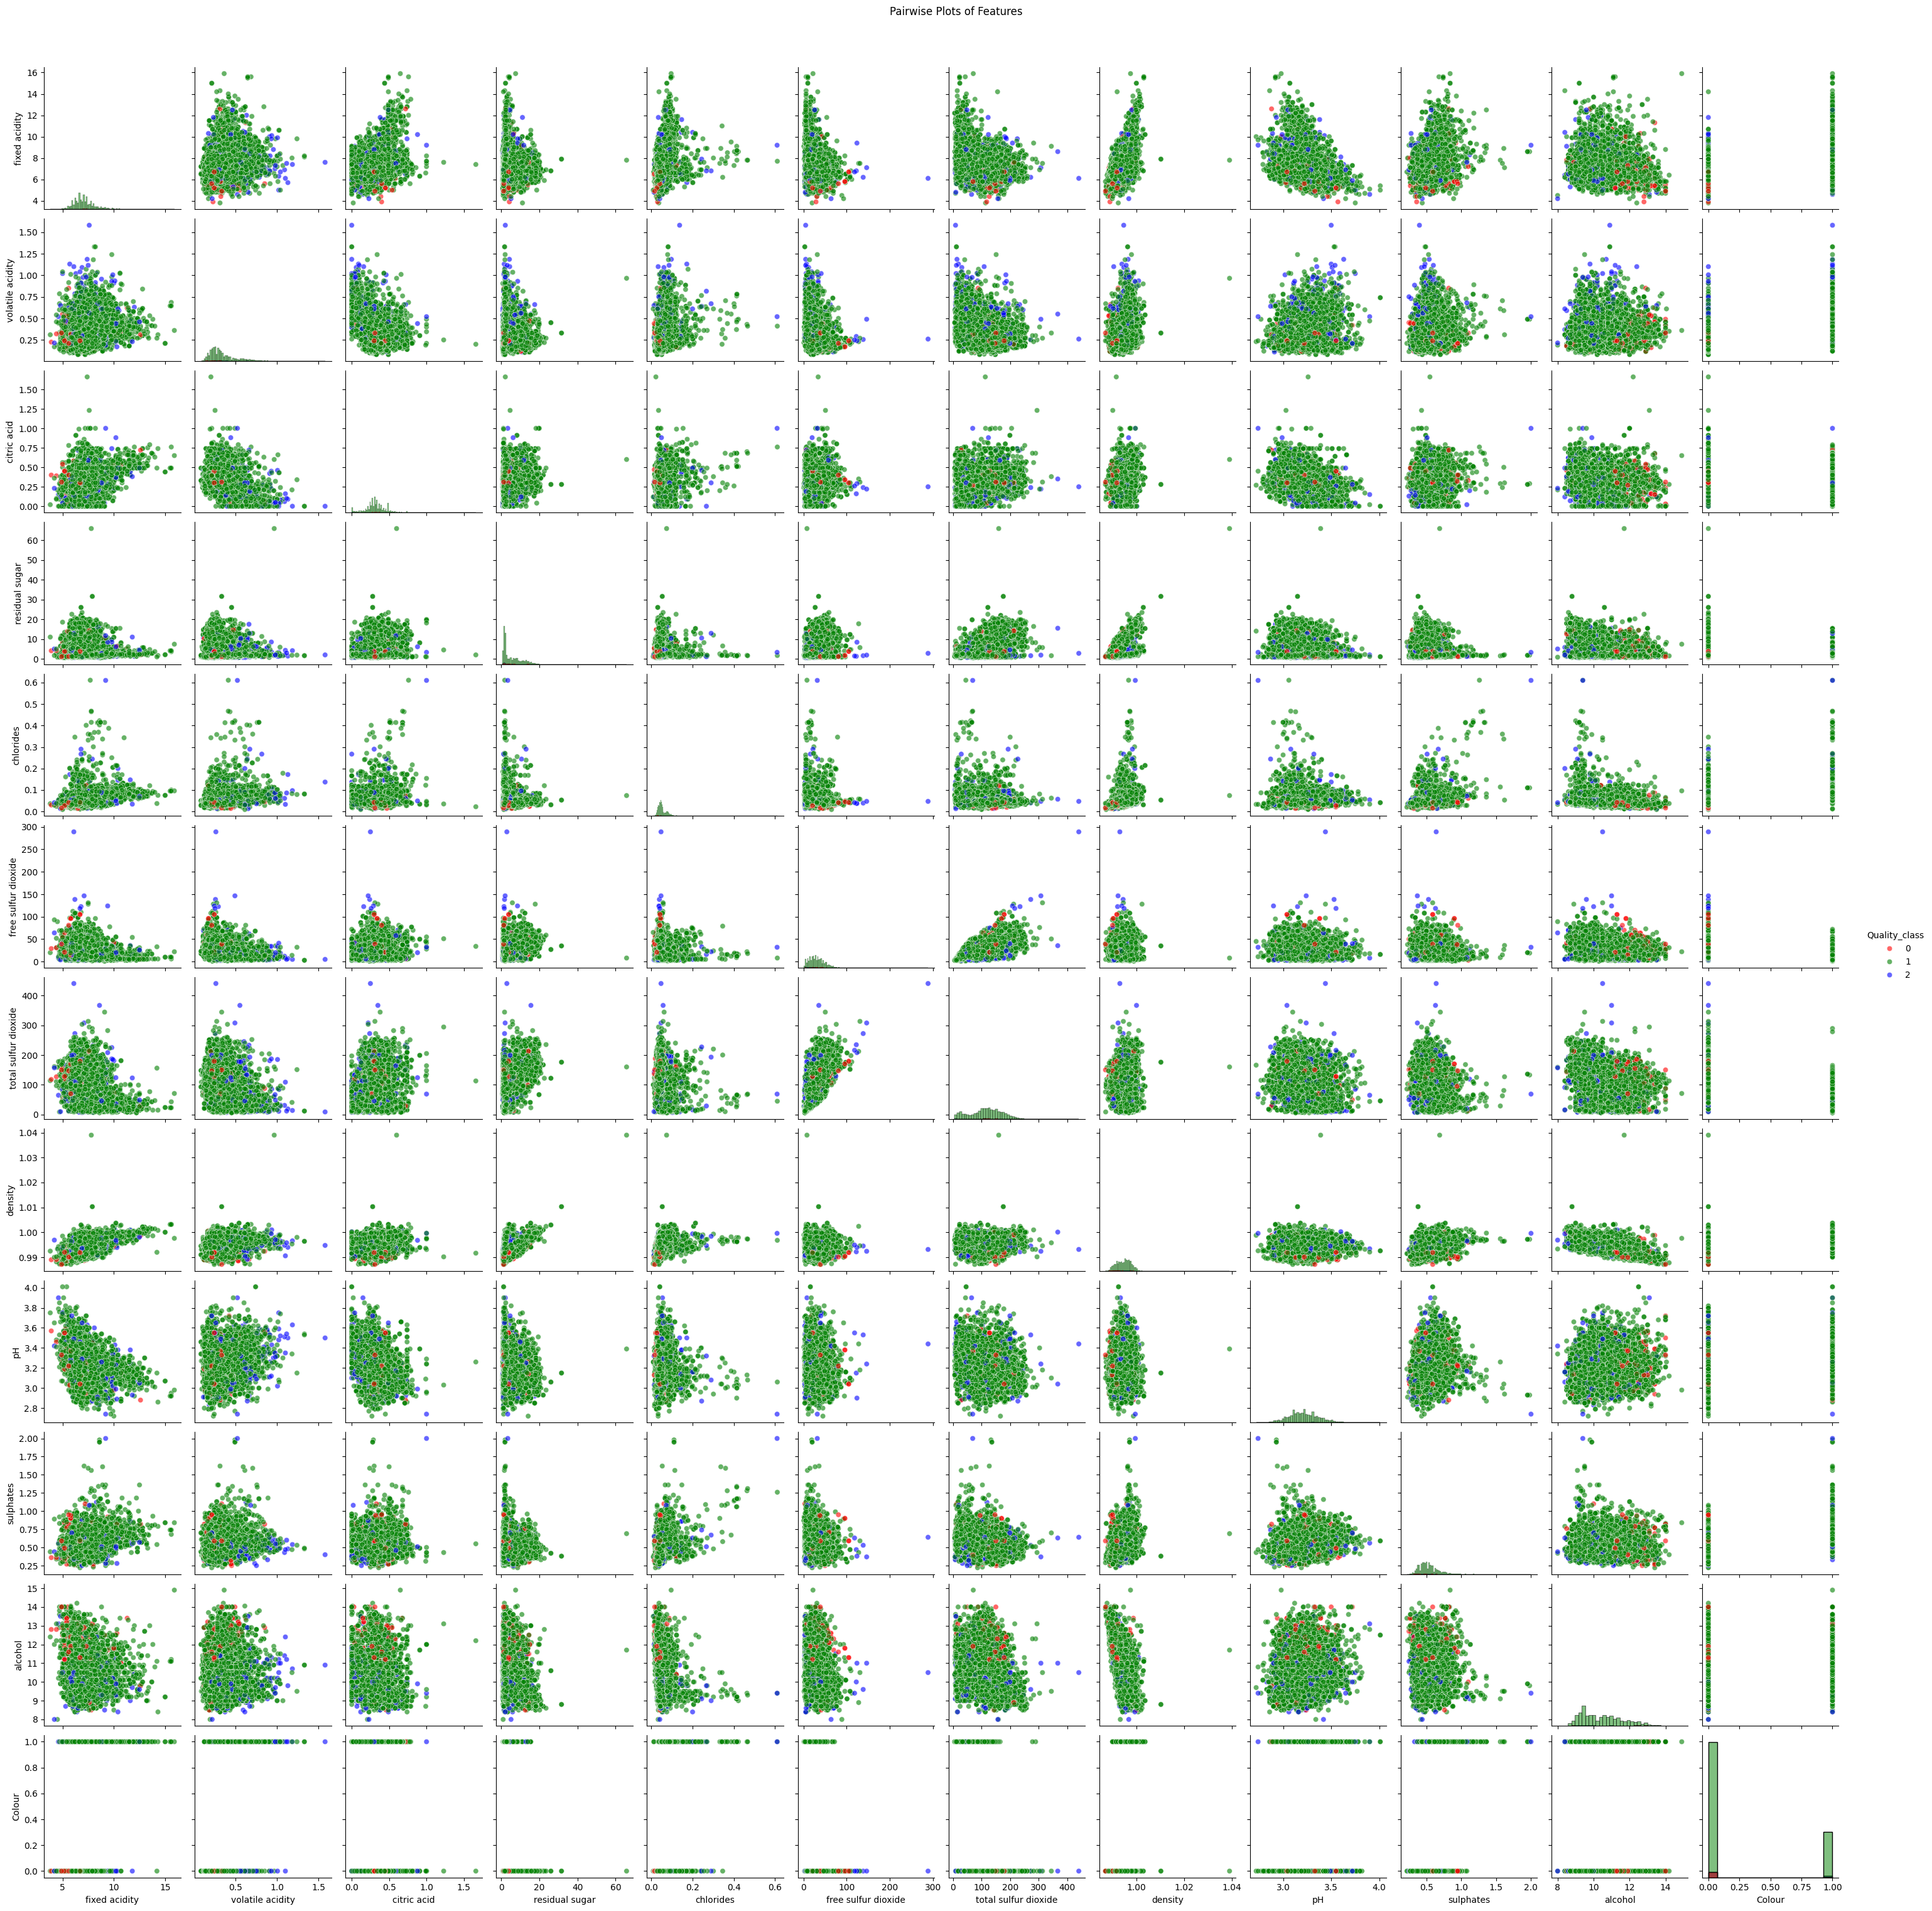

In [ ]:
#@title Visually Analyzing the dataset

#Extract numeric values inside the dataset without tags
numeric_AllBooliann_Shuffled_Cleaned_dataset= AllBooliann_Shuffled_Cleaned_dataset[AllBooliann_Shuffled_Cleaned_dataset.columns]

# Calculate the correlation matrix
corr_matrix = numeric_AllBooliann_Shuffled_Cleaned_dataset.corr()

# Plot the correlation matrix using Plotly Express
fig = px.imshow(corr_matrix,text_auto=".2f",color_continuous_scale='bluered',title='Correlation Matrix Heatmap',aspect='auto')
fig.update_layout(width=1000, height=1000)
fig.show()

print("\n\n Mutal Information for Classification\n")
print(mi_df)

# Pairwise Plotting features
custom_palette = {0: 'red', 1: 'green', 2: 'blue'}

sns.pairplot(AllBooliann_Shuffled_Cleaned_dataset,
             hue='Quality_class',
             diag_kind='hist',
             plot_kws={'alpha': 0.6},
             palette=custom_palette)

plt.suptitle('Pairwise Plots of Features', y=1.02)
plt.show()